# The Open Policing Project

Currently, a comprehensive, national repository detailing interactions between police and the public doesn’t exist. That’s why the Stanford Open Policing Project is collecting and standardizing data on vehicle and pedestrian stops from law enforcement departments across the country — and we’re making that information freely available. We’ve already gathered over 200 million records from dozens of state and local police departments across the country.

We, the Stanford Open Policing Project, are an interdisciplinary team of researchers and journalists at Stanford University. We are committed to combining the academic rigor of statistical analysis with the explanatory power of data journalism.

## 1. Examining the dataset

In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv("police.csv")

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

C:\Users\ArashMohsenijam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


              id state   stop_date stop_time location_raw  county_name  \
0  RI-2005-00001    RI  2005-01-02     01:55      Zone K1          NaN   
1  RI-2005-00002    RI  2005-01-02     20:30      Zone X4          NaN   
2  RI-2005-00003    RI  2005-01-04     11:30      Zone X1          NaN   
3  RI-2005-00004    RI  2005-01-04     12:55      Zone X4          NaN   
4  RI-2005-00005    RI  2005-01-06     01:30      Zone X4          NaN   

   county_fips  fine_grained_location police_department driver_gender  ...  \
0          NaN                    NaN               600             M  ...   
1          NaN                    NaN               500             M  ...   
2          NaN                    NaN                 0           NaN  ...   
3          NaN                    NaN               500             M  ...   
4          NaN                    NaN               500             M  ...   

   search_conducted  search_type_raw search_type contraband_found  \
0             Fal

## 2. Dropping columns

In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(509681, 26)
(509681, 24)


## 3. Dropping rows

In [3]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

id                            0
stop_date                    10
stop_time                    10
location_raw                  0
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64
id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department          

## 4. Fixing a data type

In [4]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

object
bool


## 5. Combining object columns

In [5]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                 object
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
stop_datetime            datetime64[ns]


## 6. Setting the index

In [6]:
# Set 'stop_datetime' as the index
ri.set_index(keys = 'stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)
Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_r

## 7. Examining traffic violations

In [7]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64
Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64


## 8. Comparing violations by gender

In [8]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64


## 9. Comparing speeding outcomes by gender

In [9]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=="F")&(ri.violation =='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=="M")&(ri.violation =='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


## 10. Calculating the search rate

In [10]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

object
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64
0.036959199640437465


## 11. Comparing search rates by gender

In [11]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

# Calculate the search rate for both groups simultaneously
print(ri.groupby(by='driver_gender').search_conducted.sum())

0.018751239152648355
0.04379217389811301
driver_gender
F     2459
M    15303
Name: search_conducted, dtype: int64


## 12. Adding a second factor to the analysis

In [12]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.sum())

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.sum())

driver_gender  violation          
F              Equipment               565
               Moving violation        681
               Other                   174
               Registration/plates     309
               Seat belt                63
               Speeding                667
M              Equipment              3348
               Moving violation       4278
               Other                   942
               Registration/plates    1469
               Seat belt               405
               Speeding               4861
Name: search_conducted, dtype: int64
violation            driver_gender
Equipment            F                 565
                     M                3348
Moving violation     F                 681
                     M                4278
Other                F                 174
                     M                 942
Registration/plates  F                 309
                     M                1469
Seat belt            F           

## 13.  Counting protective frisks

In [13]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtype)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

## 14. Comparing frisk rates by gender

In [14]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.08996734601959239
driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64


## 15. Calculating the hourly arrest rate

In [15]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03454755048024903
stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


## 16. Plotting the hourly arrest rate

In [16]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<Figure size 640x480 with 1 Axes>

## 17. Plotting drug-related stops

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


C:\Users\ArashMohsenijam\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


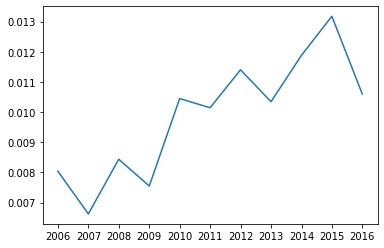

In [17]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample("A").mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Display the plot
plt.show()

## 18. Comparing drug and search rates

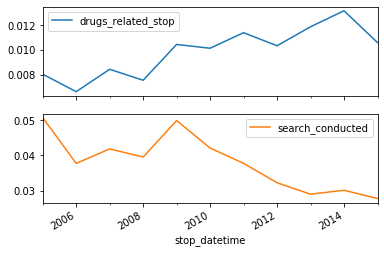

In [20]:
search_conducted_fix=ri.search_conducted.apply(pd.to_numeric, errors='coerce')
annual_search_rate = search_conducted_fix.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

# Create subplots from 'annual'|
annual.plot(subplots=True)

# Display the subplots
plt.show()

## 19.

## 20.

## 21.

## 22.

## 23.